In [9]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


class DataPoint:
    def __init__(self, features, adjacency_matrix):
        self.features = features
        self.adjacency_matrix = adjacency_matrix

# Load the data
with open("data2_100.pkl", "rb") as f:
    data = pickle.load(f)


class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x, adj):
        x = self.linear(x).float()  # Ensuring the output is float
        x = torch.matmul(adj.float(), x)  # Ensuring both operands are float
        return x


class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.gc1 = GraphConvolution(input_dim, hidden_dim)
        self.gc2 = GraphConvolution(hidden_dim, hidden_dim)  # Second layer
        self.gc3 = GraphConvolution(hidden_dim, hidden_dim)  # Second layer
        self.gc4 = GraphConvolution(hidden_dim, hidden_dim)  # Fourth layer
        self.gc5 = GraphConvolution(hidden_dim, output_dim)  # Output layer with output_dim neurons


    def forward(self, x, adj):
    
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.relu(self.gc3(x, adj))
        x = F.relu(self.gc4(x, adj))
        x = self.gc5(x, adj)  # No ReLU here before the final softmax
        return F.log_softmax(x, dim=1)

# Example usage
num_nodes = len(data[0].features)  # Number of nodes in the graph
num_features = 4  # Number of features per node
hidden_channels = 8  # Hidden layer size
output_channels = 8 # Number of output channels for the final features





# Create the GCN model
model = GCN(num_features, hidden_channels, output_channels)

# Process each data point through the GCN and collect transformed features
transformed_features = []
for data_point in data:
    adj_matrix = torch.tensor(data_point.adjacency_matrix, dtype=torch.float)
    features = torch.tensor(data_point.features, dtype=torch.float)
    adj_matrix = adj_matrix.cpu()
    features = features.cpu()
    
    # Forward pass through GCN
    output = model(features, adj_matrix).detach()  # Detach the output from the graph
    transformed_features.append(output)

# Concatenate all the outputs to form a single dataset
all_transformed_features = torch.cat(transformed_features, dim=0).numpy()

# Now all_transformed_features is ready for the autoencoder
all_transformed_features_numpy = all_transformed_features

# Normalize the data
mean = np.mean(all_transformed_features_numpy, axis=0)
std = np.std(all_transformed_features_numpy, axis=0)
std[std == 0] = 1  # Avoid division by zero
normalized_training_data_numpy = (all_transformed_features_numpy - mean) / std

2024-02-26 18:03:33.419943: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 18:03:33.520897: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 18:03:33.522080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 18:03:34.458009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
import matplotlib.pyplot as plt

# print(normalized_training_data_numpy)
# Extract features from each DataPoint object and store in x and y lists
x = normalized_training_data_numpy[:,0]
y = normalized_training_data_numpy[:,1]
%matplotlib notebook
# Plot the scatter plot
plt.scatter(x, y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data Features')
plt.show()


Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.4627 - val_loss: 0.4153
Epoch 2/300
1/1 [==============================] - 0s 36ms/step - loss: 0.4593 - val_loss: 0.4137
Epoch 3/300
1/1 [==============================] - 0s 29ms/step - loss: 0.4569 - val_loss: 0.4120
Epoch 4/300
1/1 [==============================] - 0s 27ms/step - loss: 0.4556 - val_loss: 0.4100
Epoch 5/300
1/1 [==============================] - 0s 28ms/step - loss: 0.4537 - val_loss: 0.4076
Epoch 6/300
1/1 [==============================] - 0s 28ms/step - loss: 0.4513 - val_loss: 0.4046
Epoch 7/300
1/1 [==============================] - 0s 28ms/step - loss: 0.4483 - val_loss: 0.4010
Epoch 8/300
1/1 [==============================] - 0s 30ms/step - loss: 0.4449 - val_loss: 0.3969
Epoch 9/300
1/1 [==============================] - 0s 29ms/step - loss: 0.4409 - val_loss: 0.3924
Epoch 10/300
1/1 [==============================] - 0s 29ms/step - loss: 0.4365 - val_loss: 0.3872
Epoch 11/300
1/1 [===

Epoch 84/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0179 - val_loss: 0.0307
Epoch 85/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0176 - val_loss: 0.0304
Epoch 86/300
1/1 [==============================] - 0s 32ms/step - loss: 0.0174 - val_loss: 0.0301
Epoch 87/300
1/1 [==============================] - 0s 31ms/step - loss: 0.0171 - val_loss: 0.0298
Epoch 88/300
1/1 [==============================] - 0s 32ms/step - loss: 0.0169 - val_loss: 0.0295
Epoch 89/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0166 - val_loss: 0.0292
Epoch 90/300
1/1 [==============================] - 0s 34ms/step - loss: 0.0164 - val_loss: 0.0289
Epoch 91/300
1/1 [==============================] - 0s 33ms/step - loss: 0.0161 - val_loss: 0.0285
Epoch 92/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0159 - val_loss: 0.0281
Epoch 93/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0157 - val_loss: 0.0278
Epoch 94/3

1/1 [==============================] - 0s 36ms/step - loss: 0.0077 - val_loss: 0.0114
Epoch 167/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0077 - val_loss: 0.0113
Epoch 168/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0076 - val_loss: 0.0111
Epoch 169/300
1/1 [==============================] - 0s 31ms/step - loss: 0.0076 - val_loss: 0.0110
Epoch 170/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0075 - val_loss: 0.0109
Epoch 171/300
1/1 [==============================] - 0s 31ms/step - loss: 0.0074 - val_loss: 0.0107
Epoch 172/300
1/1 [==============================] - 0s 31ms/step - loss: 0.0074 - val_loss: 0.0106
Epoch 173/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0073 - val_loss: 0.0104
Epoch 174/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0073 - val_loss: 0.0103
Epoch 175/300
1/1 [==============================] - 0s 27ms/step - loss: 0.0072 - val_loss: 0.0102
Epoch 176/300


1/1 [==============================] - 0s 29ms/step - loss: 0.0051 - val_loss: 0.0060
Epoch 249/300
1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - val_loss: 0.0060
Epoch 250/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 251/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 252/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 253/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 254/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 255/300
1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 256/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 257/300
1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 258/300


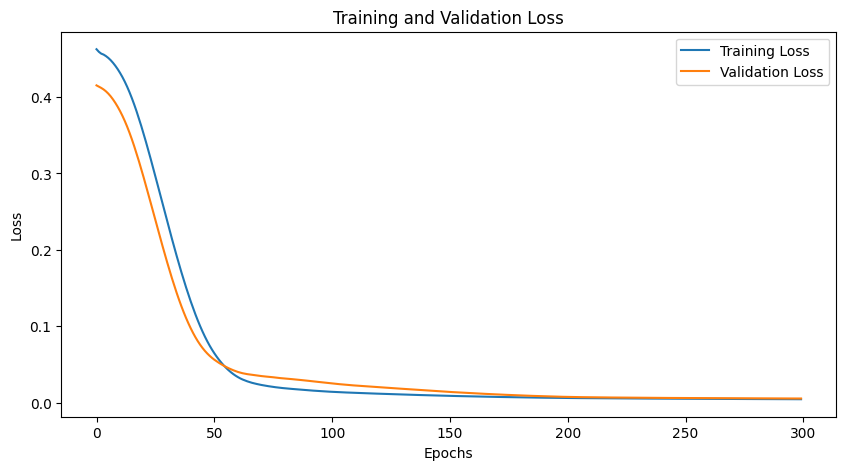

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the Graph Convolutional Layer
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x, adj):
        x = self.linear(x)
        x = torch.matmul(adj, x)
        return x

# Define the GCN Model
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(GCN, self).__init__()
        self.gc1 = GraphConvolution(input_dim, hidden_dim1)
        # Additional intermediate layer
        self.gc2 = GraphConvolution(hidden_dim1, hidden_dim2)
        self.gc3 = GraphConvolution(hidden_dim2, output_dim)

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))  # Pass through the second (new) layer with ReLU
        x = self.gc3(x, adj)  # Output layer does not have ReLU if it's the final output
        return x

# Load and prepare the data
class DataPoint:
    def __init__(self, features, adjacency_matrix):
        self.features = features
        self.adjacency_matrix = adjacency_matrix

with open("data2_100.pkl", "rb") as f:
    data = pickle.load(f)

# Initialize a GCN model
input_dim = len(data[0].features[0])
hidden_dim = 32  # You can tune this
hidden_dim2 = 16
output_dim = 12  # You can tune this, should match autoencoder input

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gcn_model = GCN(input_dim, hidden_dim,hidden_dim2, output_dim).to(device)

# Assuming the adjacency matrices are the same for all data points and stored in data[0].adjacency_matrix
adj_matrix = torch.tensor(data[0].adjacency_matrix, dtype=torch.float).to(device)

# Process data through GCN
gcn_transformed_features = []
for data_point in data:
    features_tensor = torch.tensor(data_point.features, dtype=torch.float).to(device)
    transformed_features = gcn_model(features_tensor, adj_matrix).detach().cpu().numpy()
    gcn_transformed_features.append(transformed_features.flatten())

# Convert list to NumPy array
gcn_transformed_features = np.array(gcn_transformed_features)

# Now we proceed with the autoencoder using the transformed features
input_dim = gcn_transformed_features.shape[1]
encoding_dim = 12  # This should match the GCN's output_dim

input_img = tf.keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
encoded = layers.Dense(int(encoding_dim * 3/4), activation='relu')(encoded)
encoded = layers.Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = layers.Dense(int(encoding_dim * 3/4), activation='relu')(encoded)
decoded = layers.Dense(encoding_dim, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='tanh')(decoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Normalize the GCN transformed data and split it
scaler = MinMaxScaler(feature_range=(-1, 1))
gcn_transformed_features_scaled = scaler.fit_transform(gcn_transformed_features)
train_data, val_data = train_test_split(gcn_transformed_features_scaled, test_size=0.2)

# Train the autoencoder
history = autoencoder.fit(train_data, train_data,
                          epochs=300,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(val_data, val_data))

# Evaluate the model and visualize the reconstruction quality
reconstructed_data = autoencoder.predict(val_data)

# Select random samples to display their original and reconstructed values
num_samples_to_display = 5
indices = np.random.choice(range(len(val_data)), num_samples_to_display)

print("Comparing original and reconstructed values for random data points:")
for i, index in enumerate(indices):
    print(f"\nData Point {i + 1} (Index {index}):")
    
    print(list(zip(val_data[index][:10], reconstructed_data[index][:10])))

# Visualizing the reconstruction for selected samples
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print("Training Loss: ", train_loss[-1])
print("Validation Loss: ", val_loss[-1])

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()